# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [6]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data.columns = ["Age","Tardies"]
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

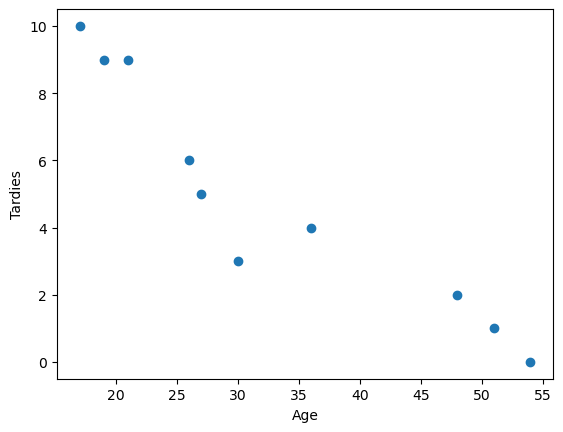

In [8]:
plt.scatter(student_data["Age"],student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Yes, there is a trend that when the age increases, the number of tardies decreases


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
"""Covariance and correlation are ways to describe the linear relationship between two variables.
However, the covariance describes only the direction of the relationship, whereas the correlation
describes the direction and the strength of the relationship.
Besides that, the covariance is dependent on the units of the variables and should only be
used in situations where the units will be made meaningful further down the line. On the other hand, 
the correlation is a relative measure and therefore can be used to compare different measures/datasets.
"""

#correlation:

print("Correlation: ",student_data["Age"].corr(student_data["Tardies"]))

#covariance:

print("Covariance: ",np.cov(student_data["Age"],student_data["Tardies"])[0][1])

# both the correlation and covariance indicate anti-correlation between variables: one goes up, the other goes down

Correlation:  -0.9391626886887122
Covariance:  -45.56666666666667


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
model = linear_model.LinearRegression()

x = student_data[["Age"]]
y = student_data["Tardies"]

result = model.fit(x,y)

# The outcome variable is tardiness because it is dependent on the age of student
# I am using linear regression as I have two correlated variables: one independent (Age) and one dependent (Tardies)


array([-0.24282077])

Plot your regression model on your scatter plot.

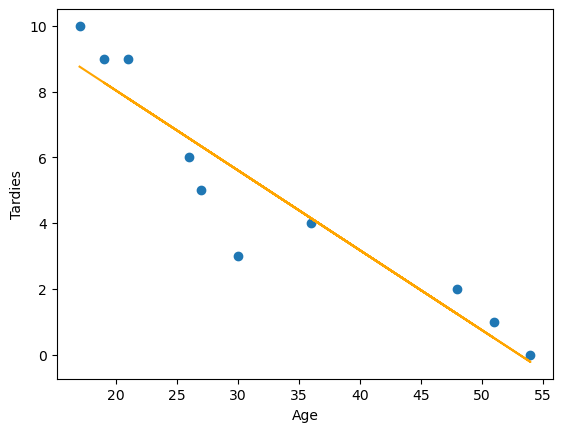

In [25]:
regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x,regression_line, c= "orange")
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
print("Score: ",model.score(x,y)) # the best score is 1
print("Intercept: ",result.intercept_)
print("Coefficient: ",result.coef_[0])

""" From the linear regression I can conclude that at age 0, it is predicted to have 12.9 tardinesses. This
value decreases by 0.24 every year.
I am confident because the R^2 score of the model is 0.88, which is close to 1. As such, I believe that age
is a good predictor of tardiness
"""

Score:  0.8820265558250109
Intercept:  12.888803363135768
Coefficient:  -0.2428207709159808


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
vehicles_filtered = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
vehicles_filtered.corr()

# More important: Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year, because the correlation is very close to
# 1 or -1, which indicates a strong correlation or strong anti-correlation, respectively
# Less important: Year, because the correlation is close to 0


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [30]:
x = vehicles_filtered[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles_filtered["CO2 Emission Grams/Mile"]

model = linear_model.LinearRegression()
model.fit(x,y)

# I will use multilinear regression, as I have more than one predictor for one dependent variable (CO2 Emission Grams/Mile)


0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [36]:
print(model.intercept_, model.coef_[0], model.score(x, y))

# I am confident because the R^2 score of the model is 0.98, which is close to 1.

769.8882836465598 -0.32061673151874365 0.9808734920269122


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [37]:
parties = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
parties.columns = ["invitations","attendances"]
parties

,invitations,attendances
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

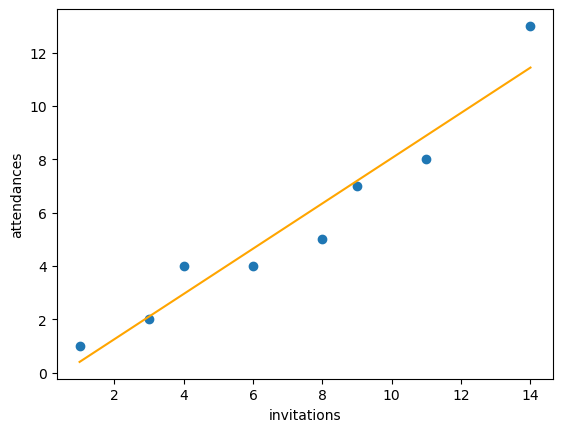

In [39]:
model = linear_model.LinearRegression()

x = parties[["invitations"]]
y = parties["attendances"]

result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x,regression_line, c= "orange")
plt.scatter(x,y)
plt.xlabel("invitations")
plt.ylabel("attendances")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [40]:
# According to the plot, it seems that the variables are positively correlated: one goes up, the other goes up

print("Score: ",model.score(x,y))
print("Intercept: ",result.intercept_)
print("Coefficient: ",result.coef_[0])

# I am confident because the R^2 score of the model is 0.93, which is close to 1.

Score:  0.9316696375519905
Intercept:  -0.43939393939393945
Coefficient:  0.8484848484848485


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

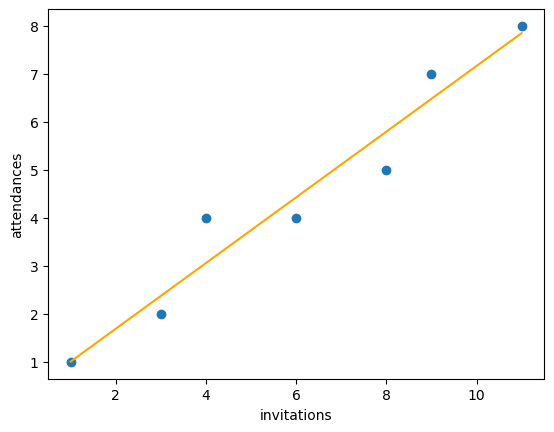

In [41]:
# It seems that the last data point is an outlier

parties_filtered = parties.drop(index=7)

model = linear_model.LinearRegression()

x = parties_filtered[["invitations"]]
y = parties_filtered["attendances"]

result = model.fit(x,y)

regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x,regression_line, c= "orange")
plt.scatter(x,y)
plt.xlabel("invitations")
plt.ylabel("attendances")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [42]:
print("Score: ",model.score(x,y))
print("Intercept: ",result.intercept_)
print("Coefficient: ",result.coef_[0])

# The R^2 score of the model increased to 0.94, which means that the model is better without the outlier.

Score:  0.9433811802232855
Intercept:  0.32330827067669254
Coefficient:  0.6842105263157894
